In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pydicom
import pickle
import tensorflow as tf
import tensorflow_io as tfio
import os
import sys

sys.path.insert(0, '../VisualizationTools')
import get_data_from_XML, get_gt, getUID, roi2rect, utils, visualization

In [2]:
## GPU tensorflow check
tf.test.is_built_with_cuda()

from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

sess = tf.compat.v1.Session(config=tf.compat.v1.ConfigProto(log_device_placement=True))

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 2210918667301163463
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 6943080448
locality {
  bus_id: 1
  links {
  }
}
incarnation: 2614692132729877371
physical_device_desc: "device: 0, name: NVIDIA GeForce GTX 1070 Ti, pci bus id: 0000:01:00.0, compute capability: 6.1"
xla_global_id: 416903419
]
Device mapping:
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: NVIDIA GeForce GTX 1070 Ti, pci bus id: 0000:01:00.0, compute capability: 6.1



In [3]:
# image_bytes = tf.io.read_file('../images/1-01.dcm')

# image = tfio.image.decode_dicom_image(image_bytes, dtype=tf.uint16)

# skipped = tfio.image.decode_dicom_image(image_bytes, on_error='skip', dtype=tf.uint8)

# lossy_image = tfio.image.decode_dicom_image(image_bytes, scale='auto', on_error='lossy', dtype=tf.uint8)

# fig, axes = plt.subplots(1,2, figsize=(10,10))
# axes[0].imshow(np.squeeze(image.numpy()), cmap='gray')
# axes[0].set_title('image')
# axes[1].imshow(np.squeeze(lossy_image.numpy()), cmap='gray')
# axes[1].set_title('lossy image');

# tag_id = tfio.image.dicom_tags.PatientsSex
# tag_value = tfio.image.decode_dicom_data(image_bytes,tag_id)
# print(tag_value)

# print(f"PatientsAge : {tag_value.numpy().decode('UTF-8')}")

# pydicomimage = pydicom.dcmread('../images/1-01.dcm')

# pydicomimage

# pixels = pydicomimage.pixel_array

# print("Pixel range: " + str(np.amin(pixels)) + " - " + str(np.amax(pixels)))
# plt.imshow(pixels,cmap="gray")

# inputfolder = '../images/2.000000-ThoraxRoutine  8.0.0  B70f-62919'
# patients = os.listdir(inputfolder)

# slices = [tf.io.read_file(inputfolder + '/' + file) for file in patients]

# slices = [tfio.image.decode_dicom_image(myslice, dtype=tf.uint16) for myslice in slices]

In [4]:
# fig, axes = plt.subplots(5, 6 ,figsize=(100,100))
# idx = 0

# for i in range(0,5):
#     for y in range(0,6):
#         axes[i][y].imshow(np.squeeze(slices[idx].numpy()), cmap='gray')
#         axes[i][y].set_title('image')
#         idx+=1

In [5]:
dcmpath = '../images/Lung-PET-CT-DX/'
annotpath = '../annot/Annotation/'

In [6]:
annotFileNames = os.listdir(annotpath)[:20]
dcmFileNames = os.listdir(dcmpath)
num_classes = 4

In [7]:
for annot in annotFileNames:
    anpath = annotpath + annot
    dicompath = dcmpath + 'Lung_Dx-' + annot
    if not os.path.isdir(dicompath):
        print("missing: ", dicompath)
        continue
    lungs = getUID.getUID_path(dicompath)
    annotations = get_data_from_XML.XML_preprocessor(anpath, num_classes=num_classes).data
    for k, v in annotations.items():
        key = k[:-4]
        if key not in lungs:
            print("missing key: ", k)
            continue
        dcm_path, dcm_name = lungs[k[:-4]]
        matrix, frame_num, width, height, ch = utils.loadFile(dcm_path)
        img_bitmap = utils.MatrixToImage(matrix[0], ch)
        print(v)
        print(dcm_name, img_bitmap)
        test = roi2rect.roi2rect(img_name = dcm_name, img_np = img_bitmap, img_data = v, label_list = ['A', 'B', 'C', 'D'])
        break
    break

missing:  ../images/Lung-PET-CT-DX/Lung_Dx-A0001
[[134. 274. 216. 338.   1.   0.   0.   0.]]
1-17.dcm [[3 3 2 ... 2 2 3]
 [3 3 3 ... 2 3 3]
 [2 3 3 ... 3 3 3]
 ...
 [3 2 3 ... 2 2 2]
 [3 3 3 ... 1 2 2]
 [3 3 3 ... 1 1 1]]


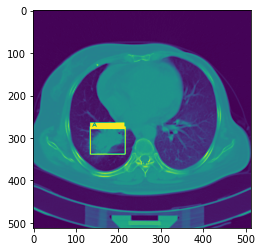

In [8]:
plt.imshow(test)